# Solar radiation nowcasting using Markov Chain
**Xinyuan Hou, 23.07**.2021

Supervised by **Dr. Stelios Kazadzis**

## Objective

- Provide info about solar radiation availability in the next hour(s) to 
- aid solar power corporations to schedule input distributions

## Data

### CAMS

- Modeling data from Copernicus Atmosphere Monitoring Service
- 15min interval
- Testbed: Berlin & Athens

### WRMC-BSRN

- World Radiation Monitoring Center - Baseline Surface Radiation Network
- Ground measurements at 50+ stations covering 80°N - 90°S

### Cloud Modification Factor
$$CMF = \frac{GHI}{GHI_{CS}}$$
- Global Horizontal Irradiation (all-sky & Clear-Sky)
- CMF 
    - -> 0: highly cloudy
    - = 1: cloudless

## Model & methods

### Markov Chain

**Markov property**: evolution of the Markov process in the future depends only on the present state and does not depend on past.

### MC Structure
1. function `classify(arr...)`

    -> `state` ->

2. function `mcFit(state, order...)`

    -> `T` (transition matrix) ->

3. function `mcPredict(T, data_test...)`

    -> weighted mean of `T` -> `pred`

### Prediction scheme

In [ ]:
    for i in 1:length(pred) 
        obs1 = data_test[i] # 9:00
        pred1 = predict_od(obs1, od, n, T) # pred 9:15
        pred[i] = pred1
        if steps > 1 # +2
            pred2 = predict_od(pred1, od, n, T) # pred 9:30
            pred[i] = pred2
            if steps > 2 # +3 
                pred3 = predict_od(pred2, od, n, T) # pred 9:45
                pred[i] = pred3
                if steps > 3 # +4 
                    pred4 = predict_od(pred3, od, n, T) # pred 10:00
                    pred[i] = pred4          

## Results 
(Berlin)

### CMF change VS pred error
- pers has highest slope: prediction deviation is larger than the other two predction approaches
- pred_b (pred from prev pred) has smallest deviation

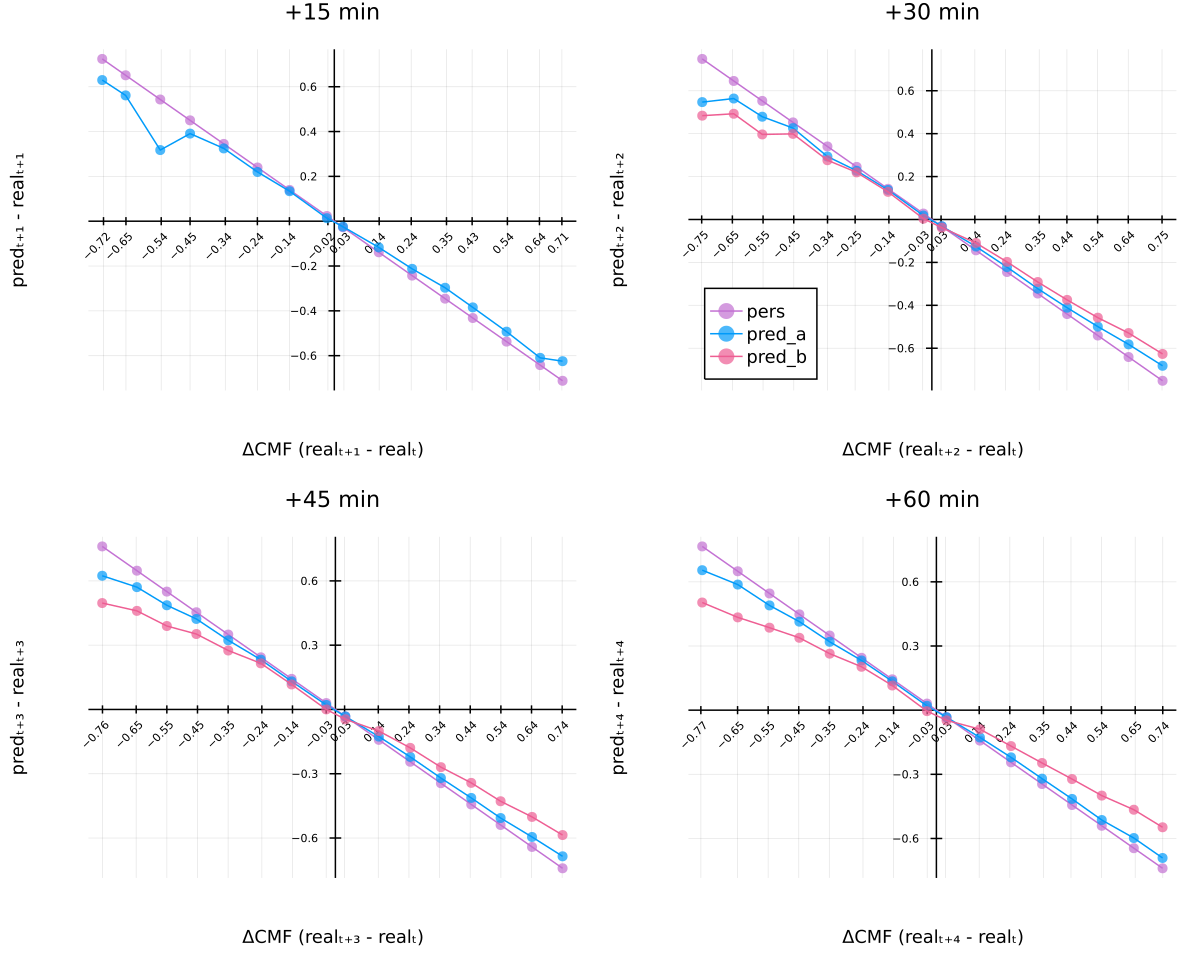

In [93]:
Fig. 1
x-axis: CMF change
y-axis: prediction error
Purple: persistence method (assume constant value from previous step)
Blue: MC prediction from observed transition,
Red: MC prediction from prediction at the previous step.    

### Inference from neighbors
- shift to 8 directions by 0.1° lon/lat
- correlation of CMF in central to neighbors at previous time step (-15 min)
- westerly flow => west cell has highest corr. coef.  

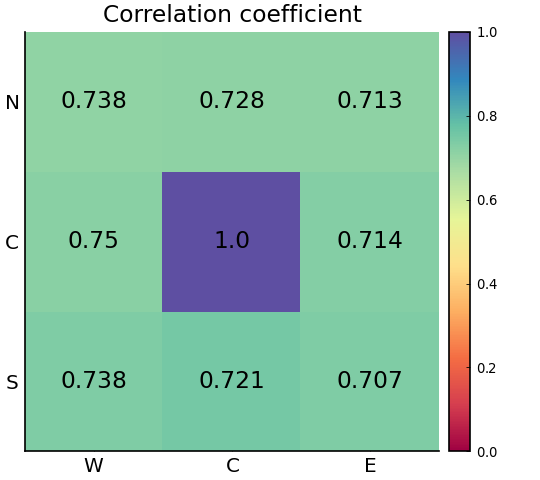

In [22]:
Fig. 2 

### Performance

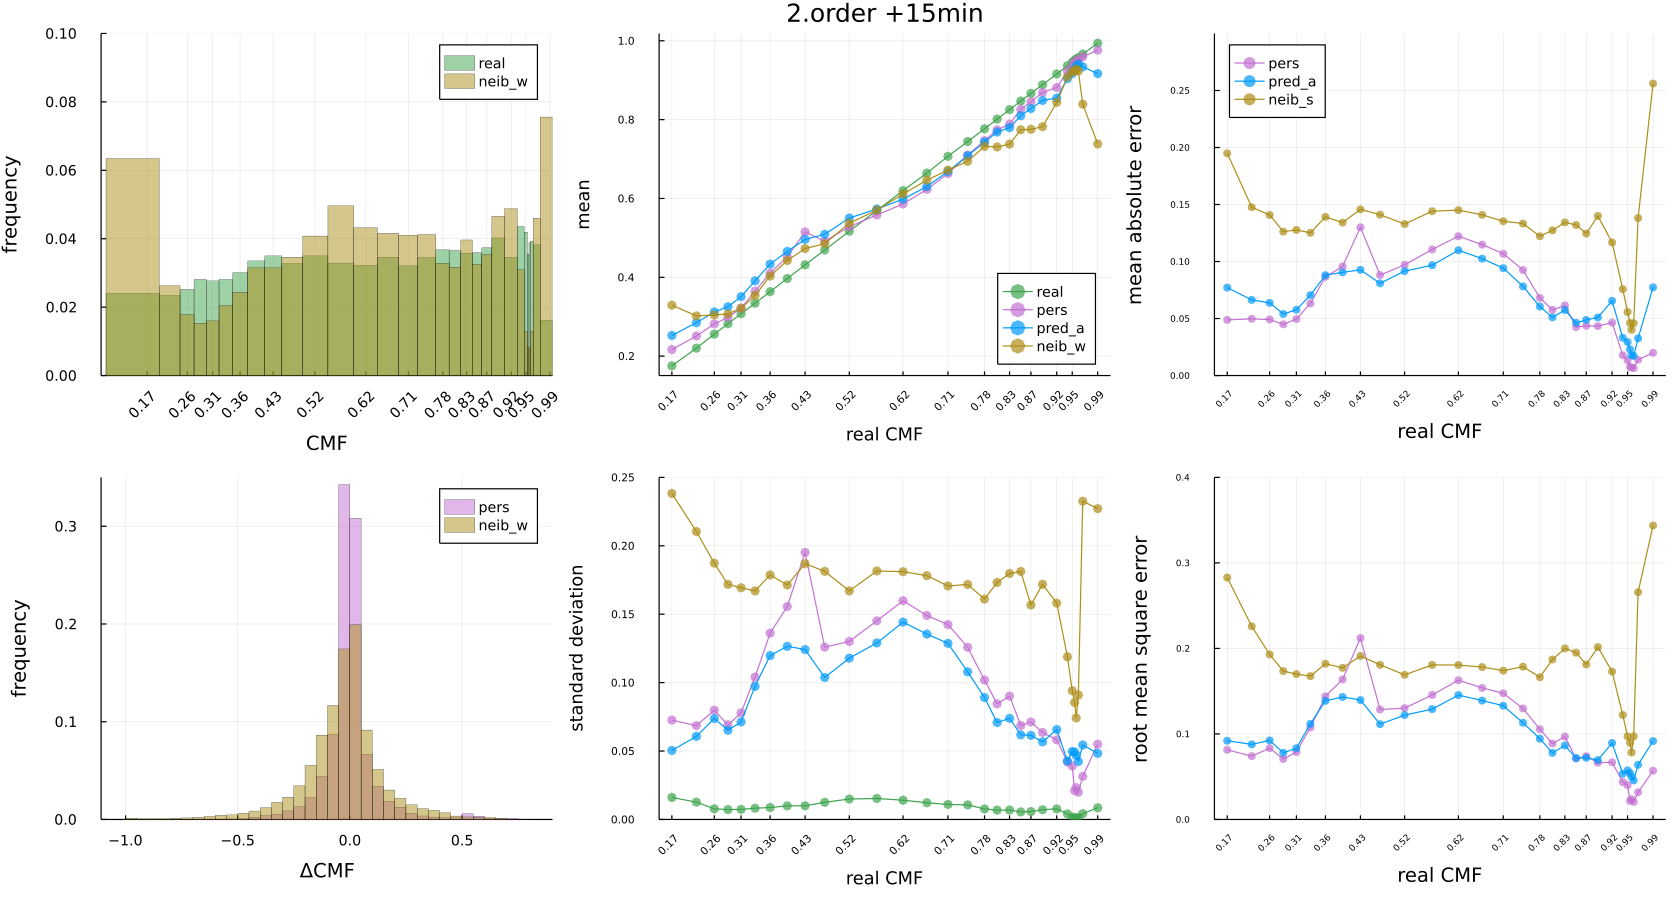

In [103]:
Fig. 3 Evaluation of 2. order Markov chain prediction for 15 min ahead.
Green: real CMF,
Olive: CMF in west cell from 15min before,
Purple: persistence method (assume constant value from previous step),
Blue: MC prediction from observed transition,
Red: MC prediction from prediction at the previous step.    

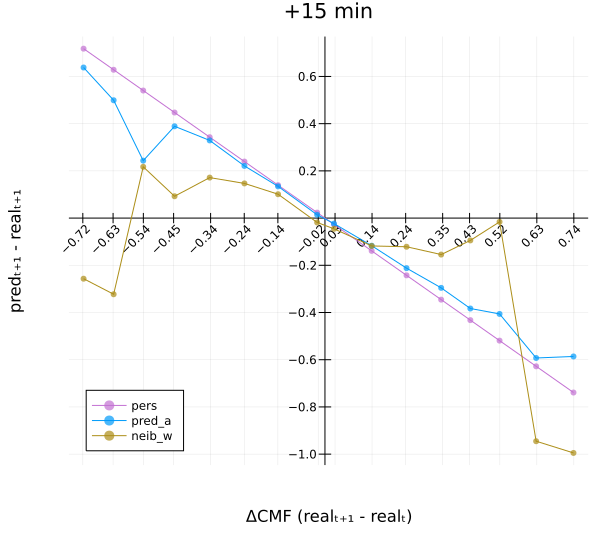

In [14]:
Fig. 4 CMF change VS prediction error including west neighbor

- Within the change range of ±0.5, CMF from west neighbor gives smaller differences than persistence or MC prediction

## Next steps

- [ ] read further literature
- [ ] check CMF correlation with neighbor cells by discerning cloud conditions
- [ ] assess measurement data to investigate minute-scale variability

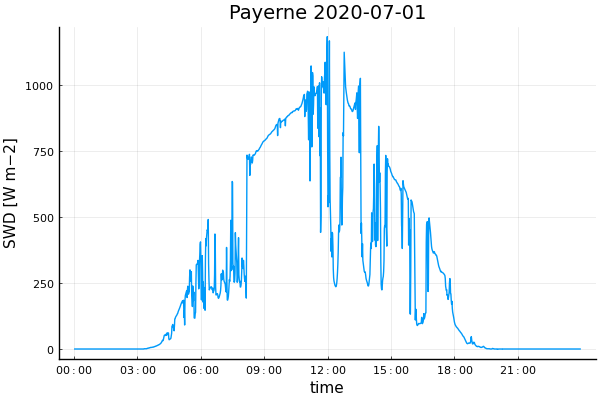

In [92]:
Fig. 5

Thank you! Questions or feedback? 📓